# Predicting Diabetes using K Nearest Neighbors Algorithm

In this project we have a dataset of 768 patients and 8 of their vital statisctics, and also whether they have diabetes or not. We shall use this dataset to build a model using K Nearest Neighbors Algorith so as to predict whether a person will have diabetes or not. Python and many of its libraries have been used to achieve the results.

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes.csv')

## The Dataset

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We see here that columns such as Glucose, BloodPressure, SkinThickness, Insulin have values of 0, however 0 is not a logical value for these attributes. It was marked zero because probably no data was available for these instances. If we work with zero values our prediction maybe faulty as in the real world no one has skin thickness of Zero. This scenario is similar to missing values or null values and therefore we will replace these 0 values with mean of the respective values.

#### Replacing Zero values with mean of resepctive columns

We are directly not going to replace zero values with mean, as then the mean value will be incorrect. We replace the zero values with NaN first, calculate mean of values which are available (ie>0) and then replace the null (NaN) values with the mean.

In [6]:
columns_to_replace = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for i in columns_to_replace:
    data[i] = data[i].replace(0,np.NaN)
    mean = int(data[i].mean(skipna=True))
    data[i] = data[i].replace(np.NaN,mean)

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,155.28125,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,85.02155,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.50000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.00000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.00000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


#### Looking at the Correlation Matrix

In [14]:
data.corr(numeric_only=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127957,0.208615,0.081770,0.055478,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127957,1.000000,0.218615,0.192677,0.420301,0.231470,0.137100,0.266591,0.492911
BloodPressure,0.208615,0.218615,1.000000,0.191892,0.072041,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192677,0.191892,1.000000,0.158133,0.543275,0.102188,0.126107,0.214873
Insulin,0.055478,0.420301,0.072041,0.158133,1.000000,0.166946,0.099170,0.136050,0.214278
BMI,0.021546,0.231470,0.281132,0.543275,0.166946,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137100,-0.002378,0.102188,0.099170,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266591,0.324915,0.126107,0.136050,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492911,0.165723,0.214873,0.214278,0.312249,0.173844,0.238356,1.000000


<Axes: title={'center': 'Correlation Matrix of Data'}>

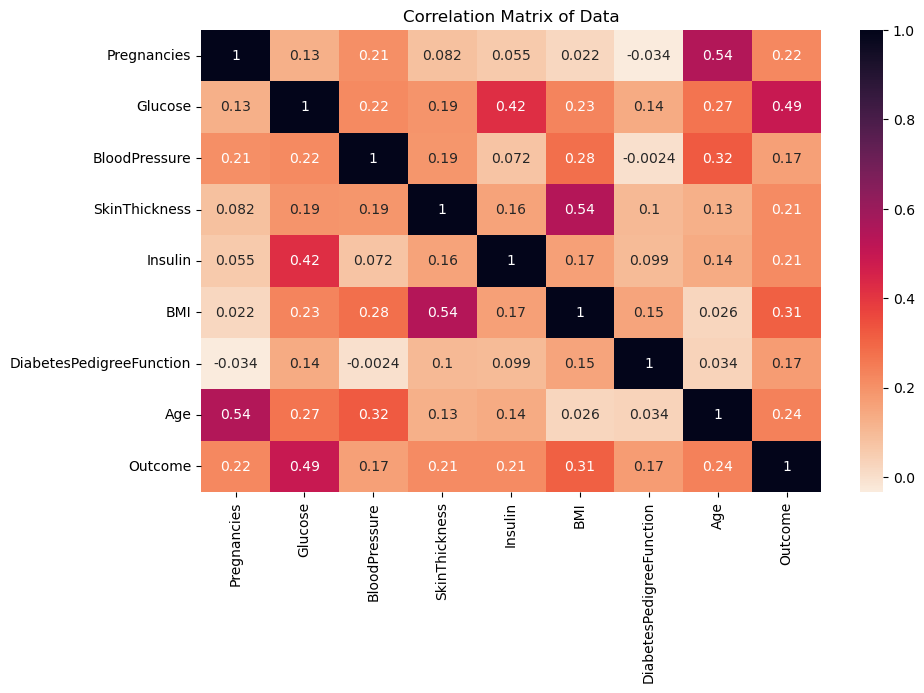

In [19]:
plt.figure(figsize=(10,6))
plt.title('Correlation Matrix of Data')
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='rocket_r')

#### Checking for Missing Values

In [20]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values

#### Checking for Duplicate Values

In [22]:
data.duplicated().value_counts()

False    768
Name: count, dtype: int64

There are no duplicate values

#### The Outcome Column

Text(0.5, 1.0, 'Distribution of Diabetes Occurances')

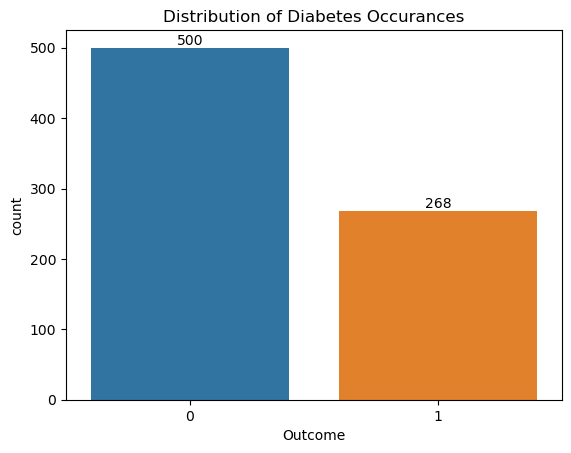

In [32]:
ax = sns.countplot(data, x='Outcome')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Diabetes Occurances')

Also note that the Outcome column in Categorical in nature, so that indicates that we need to use a Classification model for prediction.

#### Selecting and Splitting the data into Target and Features

The Target variable in this model is the Outcome column where 0 indicates diabetes not detected and 1 indicates diabetes detected.
Looking at the correlation matrix we can see all the other variables have a fairly decent positive correlation with Outcome, so we can use all the rest as features.

In [23]:
y = data['Outcome']
X = data.drop(columns='Outcome', axis=1)

In [24]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47


In [25]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Building the Model

#### Splitting the data into Train and Test Data

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#### Feature Scaling

Since we are using KNN it is an algorithm which will calculate the distance between points, it is crucial for us to scale our data. That way we can prevent very large distances from dominating and biasing our calculations. And we scale our data after we split it.

In [37]:
from sklearn.preprocessing import StandardScaler

scaled_X = StandardScaler()
X_train = scaled_X.fit_transform(X_train) # we transform and fit X train data
X_test = scaled_X.transform(X_test) # we only transform X test data

#### Defining the Model and Fitting Data

How to choose the **k**?. Ideally k should be an odd number and can be the square root of the total no of datapoints.
In this case squareroot of datapoints in y_test is ~ 12, then we take the odd number before that, i.e 11

In [39]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [40]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

#### Using the Model to Predict

In [42]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

## Evaluating the Model

#### Using Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix

In [43]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[94 13]
 [15 32]]


#### Looking at the F1 and Accuracy score

In [44]:
from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.6956521739130436


In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8181818181818182


# Conclusion

So here we created a model using KNN Algorithm to predict whether a person will have diabetes or not, based on this prediction such persons can regularly keep track of their parameters like Glucose levels, blood pressure levels and other parameters used in this model to prevent diabetes. Our model has an accuracy score of 0.81 which is decent.